In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ARMA (p,q)

In [4]:

def generate_arma_series(theta, phi, sigma, p, q, t):
    """
    Generate an ARMA time series.
    
    Parameters:
    theta (list): MA coefficients
    phi (list): AR coefficients
    sigma (float): Standard deviation of white noise
    p (int): Order of AR part
    q (int): Order of MA part
    t (int): Length of the time series to generate
    
    Returns:
    numpy.array: Generated time series
    """
    # Ensure p and q match the lengths of phi and theta
    assert len(phi) == p, "Length of phi must equal p"
    assert len(theta) == q, "Length of theta must equal q"
    
    # Generate white noise
    epsilon = np.random.normal(0, sigma, t + max(p, q))
    
    # Initialize the series
    y = np.zeros(t + max(p, q))
    
    # Generate the series
    for i in range(max(p, q), t + max(p, q)):
        # AR part
        ar_part = sum(phi[j] * y[i-j-1] for j in range(p))
        
        # MA part
        ma_part = sum(theta[j] * epsilon[i-j-1] for j in range(q))
        
        y[i] = ar_part + ma_part + epsilon[i]
    
    # Return only the last t values
    return y[-t:]

# Example usage:


In [7]:
theta = [0.5]  # MA coefficients should be same length as q
phi = [0.7, -0.2]  # AR coefficients should be same length sa p
sigma = 1.0  # Standard deviation of white noise
p = 2  # AR order
q = 1  # MA order
t = 1000  # Length of series

y = generate_arma_series(theta, phi, sigma, p, q, t)

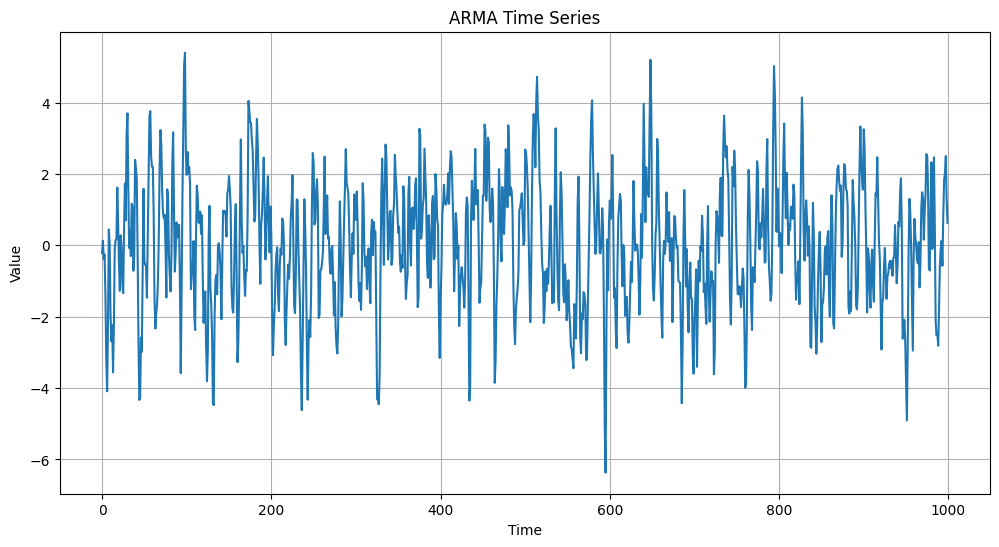

In [8]:
time = np.arange(t)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(time, y)
plt.title('ARMA Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# AR(1)

In [15]:

def generate_ar1_series(phi, t, c, sigma):
    """
    Generate a Gaussian AR(1) time series.
    
    Parameters:
    phi (float): AR coefficient
    t (int): Length of the time series to generate
    c (float): Constant term
    sigma (float): Standard deviation of white noise (default 1.0)
    
    Returns:
    numpy.array: Generated time series
    """
    # Generate white noise
    epsilon = np.random.normal(0, sigma, t)
    
    # Initialize the series
    y = np.zeros(t)
    
    # Set the initial value
    y[0] = c + epsilon[0]
    
    # Generate the series
    for i in range(1, t):
        y[i] = c + phi * y[i-1] + epsilon[i]
    
    return y



In [16]:
# Example usage:
phi = 0.7  # AR coefficient
t = 1000   # Length of series
c = 2      # Constant term
sigma = 1.0

y = generate_ar1_series(phi, t, c, sigma)

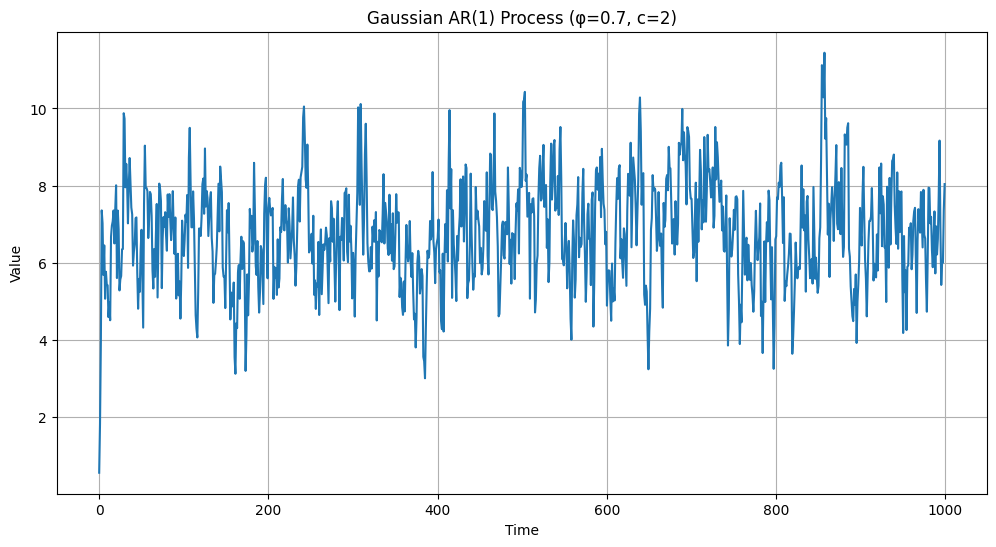

In [17]:
# Create a time array
time = np.arange(t)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(time, y)
plt.title(f'Gaussian AR(1) Process (φ={phi}, c={c})')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

## Mean and variance of AR(1)

In [18]:
mean_ar1 = c/(1-phi)
variance_ar1 = (sigma**2)/(1-phi**2)